INTRODUCTION
Everything used in this project is cited in README.md. Doing this made me realize how little I know about the programming language Python and how much I can learn. Nevertheless, I think this project represents my knowledge about web scraping at the moment. It is worth saying that it has improved a lot since I started this project.


In this file, I will quickly summarize the code found in gold_prices.py, inflation_data.py, and US_dollar_per_year.py and lead the reader through the findings of the project. Firstly, I decided on the topic I wanted to present. Later on, I figured out that it might be better to find tables on the web and adjust my topic to it, but I already made too much progress to change the topic. Always wondering about things influencing inflation and the consequences of it brought me to the websites about it. I captured the data as seen in other files. Not every table could be captured the same way, and searching the web gave me some ideas about scraping and sorting the data. In the end, I decided to sort all of the data into a JSON file. This turned out to be a good decision, since the data is now very transparent.

I started with inflation_data.py. First, I fetched the data and saw that the opening URL did not work as I wanted because it did not show the table but only the downloads folder, in which there are 3 different csv files. Since I only needed one, I decided to solve this with the zipfile library, which saved a zip file. After extracting it, I then proceeded with processing the CSV file and sorting the data in it into a JSON file.

The most simple one was US_dollar_per_year.py, which had ASCII format on the page. This made everything much easier. After fetching the data, all I had to do was sort the document to create a JSON file.

The last one was gold_prices.py, where I had to refresh my knowledge about HTML. I had to parse the html code of the webpage to find the table that I wanted, and after that, I did the same thing as I did the previous two times. I sorted and stored the data in a JSON dictionary.

In this file, I will be presenting:
1. average world inflation throughout the years, with red dashed lines marked on years where inflation in the world was the highest. The years with the highest inflation, according to the data, are 1974, 1985, 1990, 1994, 2008, and 2022. We can connect them with certain events that happened around that time that could trigger such inflation. For instance, the reason for high inflation in 1974 was the Great Inflation. It was blamed on oil prices and currency speculators. But it is obvious that the cause was monetary policies that financed massive budget deficits and were supported by political leaders. While we can blame the inflation in 2008 on the Great Recesion, and inflation in 2022 to Covid-19 and The American Rescue Plan Act of 2021, when they printed additional 1.9 trillion dollars for helping people through the pandemic.

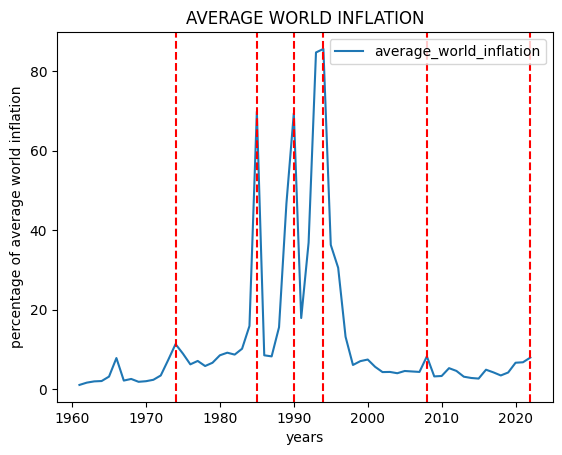

In [2]:
import matplotlib.pyplot as plt
from data.countries import countries
import json
import os


def cast_to_float(s):
    """
    Function that takes a string as an input and converts it into a float
    """
    return 0 if s == '' else float(s)


def load_inflation_data():
    """
    gets the data from inflation.json file which is in data folder
    """
    notebook_dir = os.path.dirname(os.path.abspath("__file__"))
    relative_path = 'data/inflation.json'
    inflation_file_path = os.path.join(notebook_dir, relative_path)
    
    with open(inflation_file_path, "r") as inflation_file:
        inflation_data = json.load(inflation_file)
    
    return inflation_data
inflation_data = load_inflation_data()




# calculating the sum of world inflation per year
def filter_inflation_data(start_year):
    """
    calculates the sum of world inflation per year starting from the 'start_year'
    """
    country_counter = 0
    filtered_inflation_data = {}
    for country, year_inflation_dict in inflation_data.items():
        if country in countries:
            country_counter += 1
            for year, inflation in year_inflation_dict.items():
                if int(year) >= start_year:
                    if year in filtered_inflation_data:
                        filtered_inflation_data[year] += cast_to_float(inflation)
                    else:
                        filtered_inflation_data[year] = cast_to_float(inflation)
    return filtered_inflation_data


# 1961 is the year inflation data started to be collected
average_world_inflation = filter_inflation_data(1961)


inflation_x, inflation_y = [], []
printing_x, printing_y = [], []
def inflation_graph():
    """
    Calculating the average world inflation and separating data for plot
    """
    for year, inflation in average_world_inflation.items():
        average_world_inflation[year] = average_world_inflation[year] / 194 # number of all the countries
        inflation_x.append(int(year))
        inflation_y.append(average_world_inflation[year])
inflation_graph()


plt.plot(inflation_x, inflation_y)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
def graph_fonts():
    """
    setting the right text sizes for the graph
    """
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.legend(['average_world_inflation'], loc='upper right')            # legend location 
plt.xlabel('years')                      # x - label name
plt.ylabel('percentage of average world inflation')                     # y - label name
plt.title('AVERAGE WORLD INFLATION')                                    # graph title
plt.axvline(x=2008, color='red', linestyle='--', label='Year 2008')     # location of the red dashed line
plt.axvline(x=1994, color='red', linestyle='--', label='Year 1994')
plt.axvline(x=1974, color='red', linestyle='--', label='Year 1974')
plt.axvline(x=1985, color='red', linestyle='--', label='Year 1985')
plt.axvline(x=1990, color='red', linestyle='--', label='Year 1990')
plt.axvline(x=2022, color='red', linestyle='--', label='Year 2022')

plt.show()


2. Relation between money printed and global inflation. As it is seen on the graph these two things are expectedly extremely corelated.

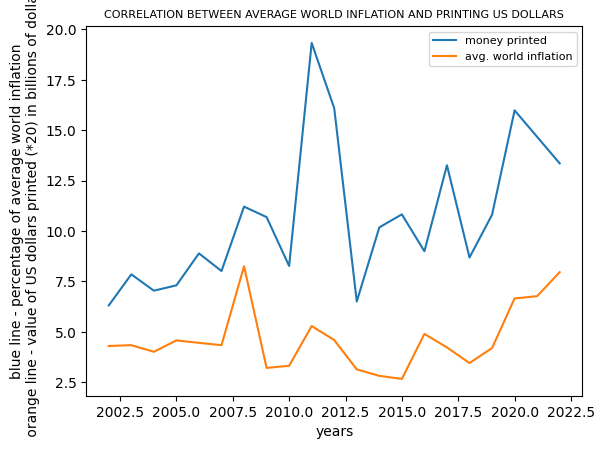

In [3]:
inflation_data = load_inflation_data()


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
relative_path = 'data/US_dollar_per_year.json'
money_printed_path = os.path.join(notebook_dir, relative_path)

with open(money_printed_path, "r") as money_printed_file:
    money_printed_data = json.load(money_printed_file)



# from 2002 that is when the data about money printed started
average_world_inflation = filter_inflation_data(2002)


inflation_x, inflation_y = [], []
printing_x, printing_y = [], []


inflation_graph()


#what i wanted on x an y axis for printing data
for year, printing_dict in money_printed_data.items():
    printing_x.append(int(year))
    printing_y.append(float(printing_dict["value"][1:]) / 20)


#making a plot
plt.plot(printing_x, printing_y, label="money printed")
plt.plot(inflation_x, inflation_y, label="avg. world inflation") 
graph_fonts()
plt.legend(loc='upper right')
plt.xlabel('years')
plt.ylabel('blue line - percentage of average world inflation\n orange line - value of US dollars printed (*20) in billions of dollars')
plt.title('CORRELATION BETWEEN AVERAGE WORLD INFLATION AND PRINTING US DOLLARS') 

plt.show()    

3. Relation between gold prices and average world inflation. while at the first glance it seems that there are no connections between those two. When you take a better look at it, you can see that they are still related.

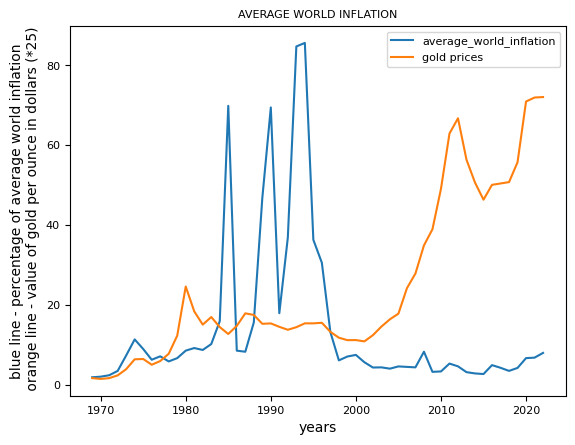

In [4]:
inflation_data = load_inflation_data()


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
relative_path = 'data/gold_prices.json'
gold_prices_path = os.path.join(notebook_dir, relative_path)
with open(gold_prices_path, "r") as gold_prices_file:
    gold_prices_data = json.load(gold_prices_file)


# the sum of inflation rate for each year from 1969, because that is when the data about gold prices started
average_world_inflation = filter_inflation_data(1969)


inflation_x, inflation_y = [], []
gold_prices_x, gold_prices_y = [], []


inflation_graph()


#since gold prices are presented as '$thousands,hundreds tens ones.decimal' i have to get rid of commas
def change_gold_price(value):
    """
    changing the values by replacing ',' with ''
    """
    if ',' in value:
        value = value.replace(',', '')
    return value


#loop which will get the data i need for the graph
for year, value_change_dict in gold_prices_data.items():
    gold_prices_x.append(int(year))
    gold_prices_y.append(float(change_gold_price(value_change_dict["Average closing price"][1:])) / 25)



plt.plot(inflation_x, inflation_y, label='average_world_inflation')
plt.plot(gold_prices_x, gold_prices_y, label="gold prices")
graph_fonts() 
plt.legend(loc='upper right')             
plt.xlabel('years')                      
plt.ylabel('blue line - percentage of average world inflation\n orange line - value of gold per ounce in dollars (*25)')                     
plt.title('AVERAGE WORLD INFLATION')                                    

plt.show()